#Lab Assignment - 2
**2023-CS543 Reinforcement Learning Lab.** \\
Instructor : Shashi Shekhar Jha (shashi@iitrpr.ac.in)

**Due on 03-03-2023    2400 Hrs   (100 Marks)**

**Submission Instructions**:
All submissions are through google classroom, upload a single colab notebook with .ipynb extension. Go to file->Download-> Download .ipynb in colab to download the file. 

In case you face any trouble with the submission, please contact the TA:

Shivam Kainth, 2020csz0006@iitrpr.ac.in



Your submission must be your original work. Do not indulge in any kind of plagiarism or copying. Abide by the honour and integrity code to do your assignment.

Late submissions will attract penalties.

**Penalty Policy**: There will be a penalty of 5% for every 24 Hr delay in the submission. E.g. For the 1st 24 Hr delay the penalty will be 5%, for submission with a delay of >24 Hr and < 48 Hr, the penalty will be 10% and so on.


**Naming Instructions**:
Name the colab file submission as follows: \<YourName>_\<rollnumber>_Lab2.ipynb 

E.g. if your name is ABC, roll number is 2022csx1234 and submission is for lab2 then you should name the colab file as: ABC_2022csx1234_lab2.ipynb


**This assignment will focus on the implementation of TD learning methods viz. the Q-learning and SARSA Algorithms on selected OpenAI Gym environments.**

**Template code is provided for reference/help and is optional to use**

## CliffWalking Environment


```
 	

gym.make("CliffWalking-v0")
```



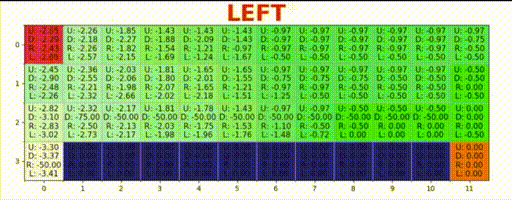

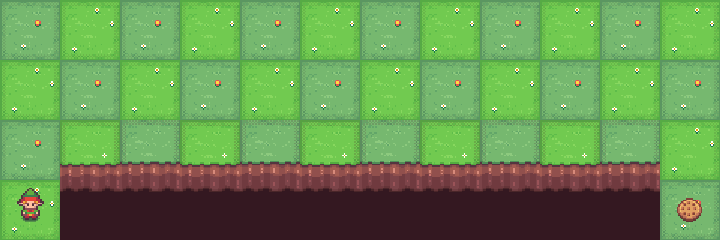

**Description**:


The board is a 4x12 matrix, with (using NumPy matrix indexing):

    [3, 0] as the start at bottom-left

    [3, 11] as the goal at bottom-right

    [3, 1..10] as the cliff at bottom-center

If the agent steps on the cliff, it returns to the start. An episode terminates when the agent reaches the goal.

**Actions**

There are 4 discrete deterministic actions:

    0: move up

    1: move right

    2: move down

    3: move left

**Observations**

There are 3x12 + 1 possible states. In fact, the agent cannot be at the cliff, nor at the goal (as this results in the end of the episode). It remains all the positions of the first 3 rows plus the bottom-left cell. The observation is simply the current position encoded as flattened index.

**Reward**

Each time step incurs -1 reward, and stepping into the cliff incurs -100 reward.
    
    

In [ ]:
!pip install gymnasium
!pip install gymnasium[toy_text]
!pip install gymnasium[box2d]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 KB 13.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 77.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 KB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 44.2 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for box2d-py
  Running setup.py clean for box2d-py
Failed to build box2d-py

In [ ]:
!pip3 install imageio==2.4.1
!pip install --upgrade imageio-ffmpeg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 26.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for imageio: filename=imageio-2.4.1-py3-none-any.whl size=3303886 sha256=bd274402e89338a6dadecefedf2732d10798b142c5834be9ea7ee350afdb84e7
  Stored in directory: /root/.cache/pip/wheels/be/7b/04/4d8d56f1d503e5c404f0de6018c0cfa592c71588a39b49e002
Successfully built imageio
  Attempting uninstall: imageio
    Found existing installation: imageio 2.9.0
    Uninstalling imageio-2.9.0:
      Successfully uninstalled imageio-2.9.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.9/26.9 MB 53.1 MB/s eta 0:00:00


In [ ]:
import gymnasium as gym
import pygame
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from google.colab import output
import time 
import os, sys
import random
import matplotlib.pyplot as plt
os.environ["SDL_VIDEODRIVER"] = "dummy"
pygame.init()
screen = pygame.display.set_mode((800,400))

random.seed(10)

In [ ]:
def render():
        color = (255, 100, 0)
        pygame.display.flip()
        view = pygame.surfarray.array3d(screen)
        view = view.transpose([1, 0, 2])
        img_bgr = cv2.cvtColor(view, cv2.COLOR_RGB2BGR)
        return img_bgr


In [ ]:
env = gym.make('CliffWalking-v0',render_mode="human")
env.reset()

(36, {'prob': 1})

In [ ]:
print(env.action_space)

Discrete(4)


Taking 10 random steps in cliffwalking 

In [ ]:
for i in range(10):
  next_state, reward, done,_,__= env.step(np.random.randint(0,4))
  render()

Implement a Q-learning agent using a purely random behavior policy for the following learning rates  α  = [0.0005,0.005,0.01,0.07,0.1]. In each case, report the effect of  α  on Q-learning and demonstrate using plots. Plot the learning curve of the policies learnt in each case using episode vs. avg reward/episode

#  Lunar Lander environment from OpenAI Gym. 
https://www.gymlibrary.dev/environments/box2d/lunar_lander/

**Description**

This environment is a classic rocket trajectory optimization problem. According to Pontryagin’s maximum principle, it is optimal to fire the engine at full throttle or turn it off. This is the reason why this environment has discrete actions: engine on or off.

There are two environment versions: discrete or continuous. In the assignment we will be dealing with **Discrete** task. The landing pad is always at coordinates (0,0). The coordinates are the first two numbers in the state vector. Landing outside of the landing pad is possible. Fuel is infinite, so an agent can learn to fly and then land on its first attempt.


**Action Space**

There are four discrete actions available: do nothing, fire left orientation engine, fire main engine, fire right orientation engine.

**Observation Space**

The state is an 8-dimensional vector: the coordinates of the lander in x & y, its linear velocities in x & y, its angle, its angular velocity, and two booleans that represent whether each leg is in contact with the ground or not.

**Rewards**

Reward for moving from the top of the screen to the landing pad and coming to rest is about 100-140 points. If the lander moves away from the landing pad, it loses reward. If the lander crashes, it receives an additional -100 points. If it comes to rest, it receives an additional +100 points. Each leg with ground contact is +10 points. Firing the main engine is -0.3 points each frame. Firing the side engine is -0.03 points each frame. Solved is 200 points.

**Starting State**

The lander starts at the top center of the viewport with a random initial force applied to its center of mass.

**Episode Termination**

The episode finishes if:

    the lander crashes (the lander body gets in contact with the moon);

    the lander gets outside of the viewport (x coordinate is greater than 1);

    the lander is not awake. From the Box2D docs, a body which is not awake is a body which doesn’t move and doesn’t collide with any other body:


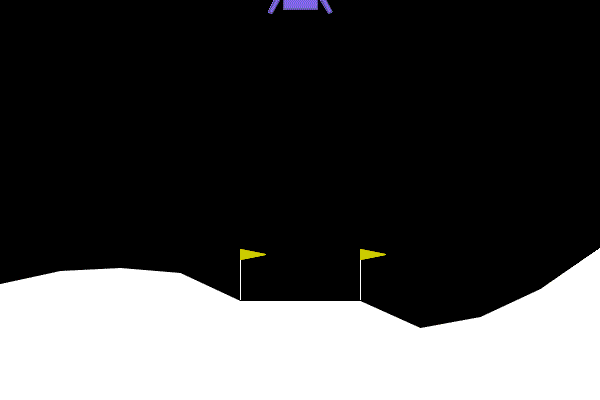

# Template code for running Lunar lander

In [ ]:
import gym
env = gym.make("LunarLander-v2",render_mode="human")

/usr/local/lib/python3.8/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [ ]:
env.reset()
render()

In [ ]:
env.action_space

Discrete(4)

Taking random actions, we have to supply 4 actions to the agent. They have to be clipped between -1.0  to  1.0

In [ ]:
for i in range(100):
  next_state, reward, done,_= env.step(np.random.randint(0,4))
  render()

# Questions [Total 100 points]


## ***On Cliff-Walking*** 

Q1. Implement a Q-learning agent using a purely random behavior policy for the following learning rates $\alpha$ = [0.0005,0.005,0.01,0.07,0.1].  In each case, report the effect of $\alpha$ on Q-learning and demonstrate using plots. Plot the learning curve of the policies learnt in each case using  episode vs. avg reward/episode  **(20 points)**
 
Q2. Implement Q-Learning using the $\epsilon$-Greedy behaviour policy with  $\alpha$ = 0.0001 and $\epsilon$ = [0.95, 0.76, 0.55, 0.25, 0.1]. What is the effect of $\epsilon$ on the performance of Q-Learning?  Support your arguments with valuable statistics and graphs. You should create a graph of Epsilon with Average Q-values for start State(3,0) ,state(0,4) , state (1,7) and state(2,9). See the image included below. **(20 points)** 

Q3. What is the relationship/similarities between Purely Random policy and $ϵ$- greedy policy? Comment on the performance difference among these policies. Is Random Policy a special case of  $ϵ$-Greedy policy?  **(5 point)**

Q4.  Implement Q-Learning using the $\epsilon-$Greedy behaviour policy where $\epsilon$ is reduced from 1 to 0.01 with increasing number of episodes. Plot the learning curve of the policy being learnt using episode vs. avg reward/episode. **(10 points)**

***Note In all the above questions, render the cliff walking with the final learnt policy ***


States whose values to be plotted for Q2 

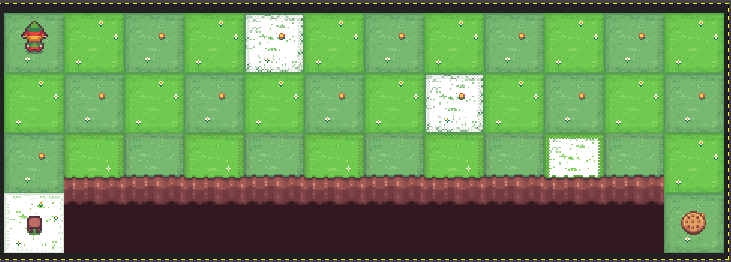



---



## ***On Lunar Lander (Box 2D)*** 

Q1. Consider $Q_0$(s, a) = 0 $\forall$ (s,a),  $\epsilon= 0.1 $ and $\alpha$ = 0.01 and implement SARSA and Expected SARSA. Plot the graphs for:  episode vs. max-time step and episode vs. average-reward in each case. State your observations. Render 3 videos for the initial, mid and final stages of the learning process for both the methods. **(20 points).**

Q2. Experiment with different $\alpha$ = [0.0005,0.005,0.01,0.1] and $\epsilon$ = [0.9, 0.5, 0.3, 0.1] combination for SARSA and Expected  SARSA agents. Discuss how changing $\alpha$ and $\epsilon$ affect the agent’s learning performance. Include graphs to help with your explanation. Also comment on best combination along with rendering its video. **(15 points).**


Q3. Implement SARSA($\lambda$) with $\lambda = 0.5$ and the best combination of the $\alpha$ and $\epsilon$ values from the previous question Q2. Compare the performance of SARSA($\lambda$) with that of plain SARSA algorithm. **(10 points).**